In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Import Data
preparado

In [3]:
train1=pd.read_csv(r'C:\Users\Nelson\Documents\Sync\Proj_Titanic\Datas\train2.csv',sep=',')
trainM1=pd.read_csv(r'C:\Users\Nelson\Documents\Sync\Proj_Titanic\Datas\trainM.csv')
trainM1=trainM1.drop(['Unnamed: 0'],axis=1)
target1=trainM1['Survived']
print(trainM1)
print(target1)
print(train1)

     Survived  Pclass  SibSp  Parch     Fare  Sex Encode  Embarked-2  Age-sep
0           0       3      1      0     7,25           1           2        1
1           1       1      1      0  712.833           0           0        3
2           1       3      0      0    7.925           0           2        2
3           1       1      1      0     53,1           0           2        3
4           0       3      0      0     8,05           1           2        3
..        ...     ...    ...    ...      ...         ...         ...      ...
886         0       2      0      0       13           1           2        2
887         1       1      0      0       30           0           2        1
888         0       3      1      2    23,45           0           2        2
889         1       1      0      0       30           1           0        2
890         0       3      0      0     7,75           1           1        2

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4   

In [24]:
#plt.scatter(x='index',y=trainM1['Survived'])
#plt.show()
train1=

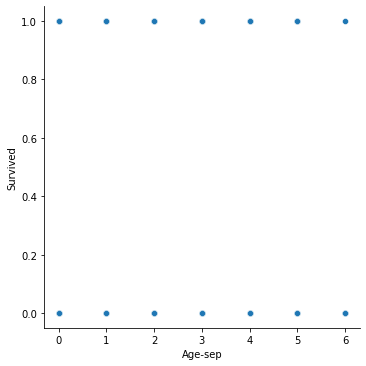

In [28]:
sns.relplot(data=trainM1,x='Age-sep', y='Survived',kind='scatter')

In [4]:
train1=train1.drop(['Unnamed: 0'], axis=1)
train1

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,3,1,0,130.982998,1,2,1
1,1,1,0,712.833000,0,0,3
2,3,0,0,7.925000,0,2,2
3,1,1,0,130.982998,0,2,3
4,3,0,0,130.982998,1,2,3
...,...,...,...,...,...,...,...
886,2,0,0,13.000000,1,2,2
887,1,0,0,30.000000,0,2,1
888,3,1,2,130.982998,0,2,2
889,1,0,0,30.000000,1,0,2


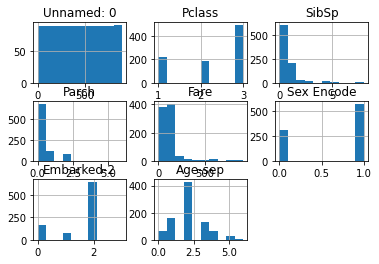

In [30]:
train1.hist()
plt.show()

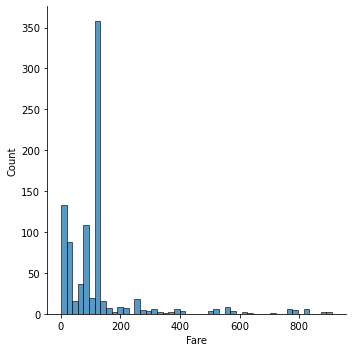

In [7]:
sns.displot(train1,x='Fare')

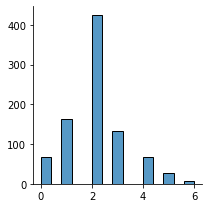

In [12]:
g=sns.FacetGrid(train1)
g.map(sns.histplot,)

In [5]:
# Separo para entrenar
X_train, X_test, y_train, y_test = train_test_split(train1, target1,test_size=0.25, random_state=0)

In [91]:
X_train.shape

(668, 7)

In [6]:
clasificador1=KNeighborsClassifier(n_neighbors=3,p=2, metric='minkowski')
clasificador1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
prediccion1=clasificador1.predict(X_test)
prediccion3=clasificador1.predict(X_train)


In [8]:
print(clasificador1.score(X_train, y_train))

0.8562874251497006


In [9]:
print(clasificador1.score(X_test, y_test))

0.8161434977578476


In [10]:
clasificador2=KNeighborsClassifier(n_neighbors=3,p=1, metric='minkowski')
clasificador2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [11]:
print(clasificador2.score(X_train, y_train))

0.8607784431137725


In [12]:
print(clasificador2.score(X_test, y_test))

0.8116591928251121


In [14]:
prediccion4=clasificador2.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediccion4, y_test))

0.8116591928251121


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=prediccion4))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       139
           1       0.78      0.69      0.73        84

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [17]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_true=y_test,y_pred=prediccion4)
print(a)    

[[123  16]
 [ 26  58]]


<AxesSubplot:>

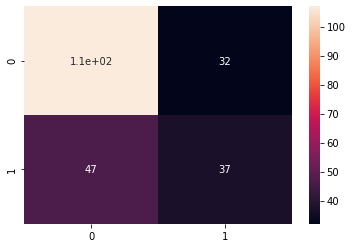

In [29]:
sns.heatmap(a,annot=True)

In [18]:
k_rango = range(1,100)
scores = []
for k in k_rango:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))


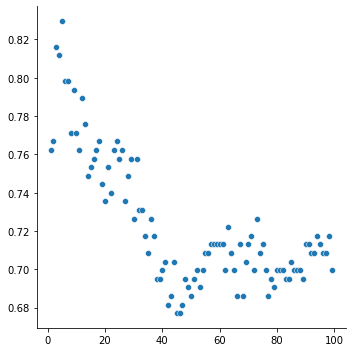

In [19]:
sns.relplot(x=k_rango, y=scores)

In [20]:
k_rango = range(1,6)
scores = []
for k in k_rango:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))


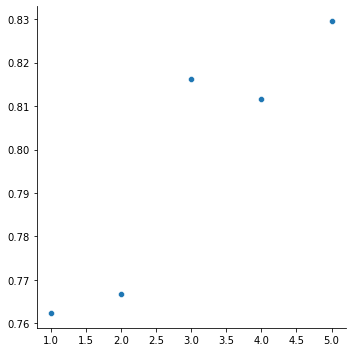

In [21]:
sns.relplot(x=k_rango, y=scores)

In [22]:
#Parece el mejor
clasificador5=KNeighborsClassifier(n_neighbors=5,p=1, metric='minkowski')
clasificador5.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [23]:
print(clasificador5.score(X_test, y_test))

0.8475336322869955


In [24]:
print(clasificador5.score(X_train, y_train))

0.8383233532934131


In [47]:
clasificador2=KNeighborsClassifier(n_neighbors=26,p=1, metric='minkowski')
clasificador2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=26, p=1)

In [48]:
print(clasificador2.score(X_test, y_test))

0.6771300448430493


In [49]:
print(clasificador2.score(X_train, y_train))

0.6497005988023952


In [131]:
X_train[['Sex Encode','Age-sep']]

,Sex Encode,Age-sep
105,1,2
68,0,1
253,1,2
320,1,1
706,0,3
...,...,...
835,0,3
192,0,1
629,1,2
559,0,3


In [132]:
y_train

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: int64

In [8]:
# _Clasifico para dos para poder visualizarlo en 2D
clasificador6=KNeighborsClassifier(n_neighbors=5,p=1, metric='minkowski')
X_set, y_set = X_train[['Sex Encode','Age-sep']], y_train
clasificador6.fit(X_set, y_set)

KNeighborsClassifier(p=1)

No handles with labels found to put in legend.


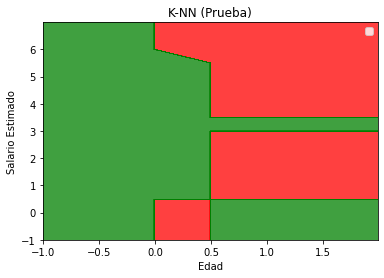

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train[['Sex Encode','Age-sep']], y_train
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
 #   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
  #              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()


In [10]:
#X_set.dt

In [139]:
"""from matplotlib.colors import ListedColormap
X_set, y_set = X_train[['Sex Encode','Age-sep']], y_train
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
 #   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
  #              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()"""

(240000,)

In [154]:
"""from matplotlib.colors import ListedColormap
X_set, y_set = X_train[['Sex Encode','Age-sep']], y_train
x_min, x_max = X_set.iloc[:, 0].min() - 1, X_set.iloc[:, 0].max() + 1
y_min, y_max = X_set.iloc[:, 1].min() - 1, X_set.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
Z = clasificador5.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
plt.show()"""

'from matplotlib.colors import ListedColormap\nX_set, y_set = X_train[[\'Sex Encode\',\'Age-sep\']], y_train\nx_min, x_max = X_set.iloc[:, 0].min() - 1, X_set.iloc[:, 0].max() + 1\ny_min, y_max = X_set.iloc[:, 1].min() - 1, X_set.iloc[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max),\n                         np.arange(y_min, y_max))\nZ = clasificador5.predict(np.c_[xx.ravel(), yy.ravel()])\n \n# Put the result into a color plot\nZ = Z.reshape(xx.shape)\nplt.figure()\nplt.pcolormesh(xx, yy, Z, cmap=cmap_light)\n \n# Plot also the training points\nplt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,\n                edgecolor=\'k\', s=20)\nplt.xlim(xx.min(), xx.max())\nplt.ylim(yy.min(), yy.max())\n    \npatch0 = mpatches.Patch(color=\'#FF0000\', label=\'1\')\npatch1 = mpatches.Patch(color=\'#ff9933\', label=\'2\')\npatch2 = mpatches.Patch(color=\'#FFFF00\', label=\'3\')\npatch3 = mpatches.Patch(color=\'#00ffff\', label=\'4\')\npatch4 = mpatches.Patch(color=\'#00FF00\', label

## Cross Validation

In [12]:
# Separo para entrenar
X_train, X_test, y_train, y_test = train_test_split(train1, target1,test_size=0.25, random_state=0)

In [13]:
#Scalerizo para ver si mejora
from sklearn.preprocessing import MinMaxScaler
escalador=MinMaxScaler()
X_train=escalador.fit_transform(X_train)
X_test=escalador.fit_transform(X_test)

In [14]:
clasificador8=KNeighborsClassifier(n_neighbors=5,p=1, metric='minkowski')
clasificador8.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [15]:
clasificador8.score(X_train, y_train)

0.8532934131736527

In [16]:
clasificador8.score(X_test, y_test)

0.8026905829596412

In [17]:
from sklearn.model_selection import KFold
ValCruz = KFold(25, shuffle=False)

In [20]:
from sklearn.model_selection import cross_val_score
VcScore=cross_val_score(clasificador8,X_train,y_train,cv=ValCruz, scoring="accuracy")
VcScore

array([0.7037037 , 0.74074074, 0.85185185, 0.66666667, 0.81481481,
       0.88888889, 0.77777778, 0.88888889, 0.74074074, 0.92592593,
       0.66666667, 0.92592593, 0.77777778, 0.88888889, 0.74074074,
       0.85185185, 0.81481481, 0.77777778, 0.76923077, 0.80769231,
       0.80769231, 0.88461538, 0.76923077, 0.73076923, 0.88461538])

In [21]:
VcScore.max()

0.9259259259259259

In [24]:
# Buscando el mejor k con cross validation
# Ya se que andaba bien 
k_range = range(1, 30)
k_scores = []

for k in k_range:
    
    clasificador9  = KNeighborsClassifier(n_neighbors=k)
    scores3 = cross_val_score(clasificador9, X_train,y_train, cv=10, scoring='accuracy')
    k_scores.append(scores3.mean())

print(k_scores)

[0.7545002261420171, 0.7859565807327, 0.7890094979647219, 0.799366802351877, 0.7934418815015831, 0.8054047942107643, 0.7994120307553143, 0.8068747173224786, 0.7949570330167346, 0.80239710538218, 0.7964721845318861, 0.8068973315241971, 0.8039574853007687, 0.8024197195838987, 0.7964495703301673, 0.8024197195838987, 0.7979873360470375, 0.8024423337856174, 0.8054274084124831, 0.7964495703301674, 0.7949344188150159, 0.7994572591587515, 0.7979421076436002, 0.7994572591587515, 0.7994572591587517, 0.8009497964721846, 0.7979647218453187, 0.7994572591587515, 0.8024649479873359]


The optimal number of neighbors is 12


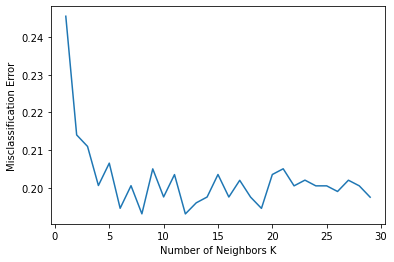

In [35]:
mse = [1 - x for x in k_scores]

optimal_k = k_range[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(k_range, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [39]:
clasificador10=KNeighborsClassifier(n_neighbors=7,p=1, metric='minkowski')
clasificador10.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [40]:
clasificador10.score(X_test, y_test)

0.7937219730941704

In [42]:
clasificador10.score(X_train, y_train)

0.8547904191616766

In [43]:
clasificador11=KNeighborsClassifier(n_neighbors=17,p=1, metric='minkowski')
clasificador11.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17, p=1)

In [44]:
clasificador11.score(X_test, y_test)

0.7937219730941704